In [1]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import random
from tqdm import tqdm 

In [5]:
path = '/home/saurav/Sowmen_DL/Image Manipulation/Image_Manipulation_Dataset/'
os.listdir(path)


['BUET_Paper', 'CASIA_2.0', 'IMD2020']

In [304]:
imdlabel = []

In [305]:
imd_link = '/home/saurav/Sowmen_DL/Image_Manipulation_Dataset/IMD2020'
pair = []
img_l = []
mask_l = []
for folders in os.listdir(imd_link):
  for strings in os.listdir(imd_link + '/' + folders):
    #print(strings)
    if 'mask' in strings:
      #pair.append((folders + '/' + strings[: len(strings) - 9] + '.png', folders + '/' + strings))
      img_l.append(folders + '/' + strings[: len(strings) - 9] + '.png')
      mask_l.append( folders + '/' + strings)
      imdlabel.append(1)
    elif "_orig" in strings: 
      img_l.append(folders + '/' + strings)
      #print(folders + '/' + strings)
      mask_l.append(None)
      imdlabel.append(0)

In [306]:
print(len(imdlabel))

1361


In [307]:
df = pandas.DataFrame(data={"image": img_l, "mask": mask_l, "label" : imdlabel})
df.to_csv("./imd2020.csv", sep=',',index=False)

In [124]:
print(df.head())

Image link                  Mask link
0  1c2ojm/c9con3s_0.png  1c2ojm/c9con3s_0_mask.png
1  1c2ojm/c9clhtf_0.png  1c2ojm/c9clhtf_0_mask.png
2  1c2ojm/c9coynw_0.png  1c2ojm/c9coynw_0_mask.png
3  1c2ojm/c9cm824_0.png  1c2ojm/c9cm824_0_mask.png
4  1c2ojm/c9chqo0_0.png  1c2ojm/c9chqo0_0_mask.png


In [128]:
clean = 0
corrupted = 0
for i in range(len(dataframe)):
    img = cv2.imread(imd_path + '/' + dataframe.loc[i]['Image link'])
    mask = cv2.imread(imd_path + '/' + dataframe.loc[i]['Mask link'])
    if(img.shape[2] == 3 and mask.shape[2] == 3):
        clean += 1
    else:
        corrupted += 1

print(str(clean) + " " + str(corrupted))

1153 0


In [265]:
dataframe = pandas.read_csv(path + '/datagen.csv')

In [266]:
dataframe.head()

,Unnamed: 0,label,image,mask,Percentage
0,0,1,Tp_S_NNN_S_N_sec00065_sec00065_10383.tif,Tp_S_NNN_S_N_sec00065_sec00065_10383_gt.png,1.916504
1,1,0,Au_art_00013.jpg,NaN,0.000000
2,2,0,Au_nat_20082.jpg,NaN,0.000000
3,3,1,Tp_D_CRN_S_N_cha00036_art00076_11740.jpg,Tp_D_CRN_S_N_cha00036_art00076_11740_gt.png,1.494344
4,4,0,Au_pla_30191.jpg,NaN,0.000000


In [267]:
tp_link = path + '/CASIA_2.0/Tp'
gt_link = path + '/CASIA_2.0/Gt'


In [1]:
fold = os.listdir(tp_link)
print(len(fold))

NameError: name 'tp_link' is not defined

In [269]:
fold1 = os.listdir(gt_link) #.png --- all of them
print(len(fold1))

5123


In [181]:
print(fold[0])
print(fold1[0])
dict = {}


Tp_S_NNN_S_B_art00042_art00042_01412.tif
Tp_D_NRN_M_N_sec10112_art00098_10343_gt.png


In [176]:
print(dict)

{'.tif': 1, '.jpg': 1, '.txt': 1}


In [270]:
G = []
I = []
for i in range(len(fold1)):
    str = fold1[i][ : len(fold1[i]) - 7]
    if str + '.tif' in fold:
        I.append(str + '.tif')
        G.append(fold1[i])
    if str + '.jpg' in fold:
        I.append(str + '.jpg')
        G.append(fold1[i])

In [285]:
print(len(I))
print(len(G))

5120
5120


In [287]:
x = 0
y = 0

images = []
masks = []

for i in range(len(I)):
    img = cv2.imread(tp_link + '/' + I[i])
    mask = cv2.imread(gt_link + '/' + G[i])
    if i == 1299:
        continue
    if img.shape == mask.shape:
        dims = img.shape
        if dims[1] > 0 and dims[0] > 0 and dims[2] > 0:
            images.append('Tp/' + I[i])
            masks.append('Gt/' + G[i])
        x += 1
    else:
        y += 1
       

print(x)
print(y)

5102
17


In [288]:
print(len(images))
print(len(masks))
print(path)
#print(os.listdir(path))

5102
5102
/home/saurav/Sowmen_DL/Image_Manipulation_Dataset


In [289]:
print(path)
os.listdir(path)

/home/saurav/Sowmen_DL/Image_Manipulation_Dataset


['CASIA_2.0', 'IMD2020', 'imd2020.csv', 'csv', 'datagen.csv']

In [279]:
d = pandas.read_csv(path + '/datagen.csv')
d.head()

,Unnamed: 0,label,image,mask,Percentage
0,0,1,Tp_S_NNN_S_N_sec00065_sec00065_10383.tif,Tp_S_NNN_S_N_sec00065_sec00065_10383_gt.png,1.916504
1,1,0,Au_art_00013.jpg,NaN,0.000000
2,2,0,Au_nat_20082.jpg,NaN,0.000000
3,3,1,Tp_D_CRN_S_N_cha00036_art00076_11740.jpg,Tp_D_CRN_S_N_cha00036_art00076_11740_gt.png,1.494344
4,4,0,Au_pla_30191.jpg,NaN,0.000000


In [290]:

label = [1 for i in range(len(masks))]


In [292]:
for i in range(len(df)):
    if df.loc[i]['label'] == 0:
        var = None
        images.append('Au/' + df.loc[i]['image'])
        #print(df.loc[i]['image'])
        masks.append(var)
        label.append(0)

In [293]:
print(len(df))
print(len(label))

12621
12603


print(len(df))

In [294]:
dataframe = pandas.DataFrame(data={"image": images, "mask": masks, 'label' : label})
dataframe.to_csv("casia2.csv",index=False)

In [295]:
dataframe.tail()

,image,mask,label
12598,Au/Au_sec_30356.jpg,None,0
12599,Au/Au_ani_30495.jpg,None,0
12600,Au/Au_sec_30020.jpg,None,0
12601,Au/Au_ani_30667.jpg,None,0
12602,Au/Au_arc_30494.jpg,None,0


In [296]:
dataframe.head()

,image,mask,label
0,Tp/Tp_D_NRN_M_N_sec10112_art00098_10343.tif,Gt/Tp_D_NRN_M_N_sec10112_art00098_10343_gt.png,1
1,Tp/Tp_D_NRN_S_N_sec00023_sec00022_10807.jpg,Gt/Tp_D_NRN_S_N_sec00023_sec00022_10807_gt.png,1
2,Tp/Tp_S_CRN_M_N_art00066_art00066_10473.tif,Gt/Tp_S_CRN_M_N_art00066_art00066_10473_gt.png,1
3,Tp/Tp_D_NRD_S_B_sec00010_cha00071_00030.tif,Gt/Tp_D_NRD_S_B_sec00010_cha00071_00030_gt.png,1
4,Tp/Tp_S_CNN_S_N_sec20015_sec20015_01605.tif,Gt/Tp_S_CNN_S_N_sec20015_sec20015_01605_gt.png,1


In [5]:
casia_df = pd.read_csv('casia2.csv')
casia_df.head()

,image,mask,label
0,Tp/Tp_D_NRN_M_N_sec10112_art00098_10343.tif,Gt/Tp_D_NRN_M_N_sec10112_art00098_10343_gt.png,1
1,Tp/Tp_D_NRN_S_N_sec00023_sec00022_10807.jpg,Gt/Tp_D_NRN_S_N_sec00023_sec00022_10807_gt.png,1
2,Tp/Tp_S_CRN_M_N_art00066_art00066_10473.tif,Gt/Tp_S_CRN_M_N_art00066_art00066_10473_gt.png,1
3,Tp/Tp_D_NRD_S_B_sec00010_cha00071_00030.tif,Gt/Tp_D_NRD_S_B_sec00010_cha00071_00030_gt.png,1
4,Tp/Tp_S_CNN_S_N_sec20015_sec20015_01605.tif,Gt/Tp_S_CNN_S_N_sec20015_sec20015_01605_gt.png,1


In [27]:
data = []

In [28]:
ROOT = 'Image_Manipulation_Dataset/CASIA_2.0/image_patch_128'

for idx, row in tqdm(casia_df.iterrows()):
    image = row['image'].split('/')[-1].split('.')[0]
    
    files = [x for x in os.listdir(os.path.join(ROOT,image)) if not x.endswith('.txt')]
    
    if(row['label'] == 1):
        for i in range(0, len(files)//2):
            if( os.path.exists(os.path.join(ROOT,image,f'{i}.png')) and
                os.path.exists(os.path.join(ROOT,image,f'{i}_gt.png'))
            ):
                data.append({
                    'image' : image,
                    'image_patch' : f'{i}.png',
                    'mask_patch' : f'{i}_gt.png',
                    'label' : 1
                })
    else:
        for i in range(0, len(files)):
            if( os.path.exists(os.path.join(ROOT,image,f'{i}.png'))):
                data.append({
                    'image' : image,
                    'image_patch' : f'{i}.png',
                    'mask_patch' : '',
                    'label' : 0
                })

12593it [00:02, 6087.40it/s]


In [29]:
casia_new_df = pd.DataFrame(data)
casia_new_df.head()

,image,image_patch,mask_patch,label
0,Tp_D_NRN_S_N_sec00023_sec00022_10807,0.png,0_gt.png,1
1,Tp_D_NRN_S_N_sec00023_sec00022_10807,1.png,1_gt.png,1
2,Tp_D_NRN_S_N_sec00023_sec00022_10807,2.png,2_gt.png,1
3,Tp_S_CRN_M_N_art00066_art00066_10473,0.png,0_gt.png,1
4,Tp_S_CRN_M_N_art00066_art00066_10473,1.png,1_gt.png,1


In [30]:
casia_new_df.to_csv('casia_128.csv', index=False)

In [6]:
imd_df = pd.read_csv('imd2020.csv')
imd_df.label.value_counts()

1    1153
0     208
Name: label, dtype: int64

In [7]:
imd_df.head()

,image,mask,label
0,1c2ojm/c9con3s_0.png,1c2ojm/c9con3s_0_mask.png,1
1,1c2ojm/c9clhtf_0.png,1c2ojm/c9clhtf_0_mask.png,1
2,1c2ojm/1c2ojm_orig.png,NaN,0
3,1c2ojm/c9coynw_0.png,1c2ojm/c9coynw_0_mask.png,1
4,1c2ojm/c9cm824_0.png,1c2ojm/c9cm824_0_mask.png,1


In [8]:
os.listdir()

['test.py',
 'casia_64.csv',
 'Image_Manipulation_Dataset',
 'createCSV.ipynb',
 'casia2.csv',
 'datagen.ipynb',
 'imd2020.csv',
 'patch_extract.py',
 '.gitignore',
 'casia_128.csv',
 '.git']

In [19]:
curr = os.getcwd() + '/Image_Manipulation_Dataset/IMD2020/imd_data'


In [22]:
imd_df.head()

,image,mask,label
0,1c2ojm/c9con3s_0.png,1c2ojm/c9con3s_0_mask.png,1
1,1c2ojm/c9clhtf_0.png,1c2ojm/c9clhtf_0_mask.png,1
2,1c2ojm/1c2ojm_orig.png,NaN,0
3,1c2ojm/c9coynw_0.png,1c2ojm/c9coynw_0_mask.png,1
4,1c2ojm/c9cm824_0.png,1c2ojm/c9cm824_0_mask.png,1


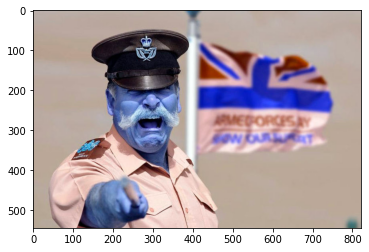

In [56]:
g = None #RGB image
for i in range(len(imd_df)):
    if imd_df.loc[i]['label'] == 0:
        load = cv2.imread(curr + '/' + imd_df.loc[i]['image'])
        #gload = cv2.Canny(load, 100, 200)
        g = load
        grayimg = cv2.cvtColor(load, cv2.COLOR_BGR2GRAY)
        plt.imshow(g)
        plt.show()
        break

(545, 822, 3)


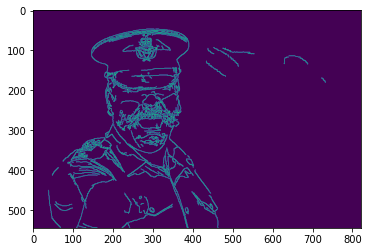

In [68]:
print(g.shape)
Gray = cv2.cvtColor(g, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.Canny(Gray, 100, 200))
plt.show()

In [72]:
def extract_imd_orig(IMG, increament):
  img = cv2.cvtColor(IMG, cv2.COLOR_BGR2GRAY)
  img = cv2.Canny(img, 100, 200)
  coords = []
  d = img.shape
  patches = [] # Ei list e ekta image er jnno shobgula patch thakbe
  for i in range(0, d[0], increament):
    for j in range(0, d[1], increament):
      x = i + increament
      y = j + increament
      if x > d[0] or y > d[1]:
        break
      p = img[i : x, j : y]
      calc = cv2.countNonZero(p)
      coords.append((calc, i, x, j, y))
  coords.sort(reverse= True)
  imd_patch = []
  for i in range(5):
      print("Patch no: " + str(i))
      plt.imshow(img[coords[i][1] : coords[i][2], coords[i][3] : coords[i][4]])
      plt.show()
      plt.imshow(IMG[coords[i][1] : coords[i][2], coords[i][3] : coords[i][4]])
      plt.show()
  if len(coords) <= 5:
      for i in range(len(coords)):
          imd_patch.append(IMG[coords[i][1] : coords[i][2], coords[i][3] : coords[i][4]])
  else:
      for i in range(5):
          imd_patch.append(IMG[coords[i][1] : coords[i][2], coords[i][3] : coords[i][4]])
  return imd_patch

Patch no: 0


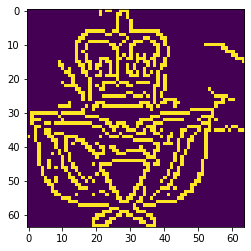

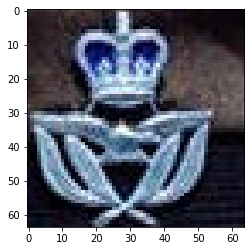

Patch no: 1


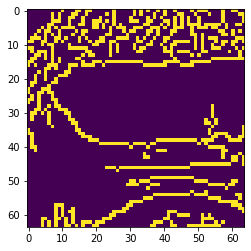

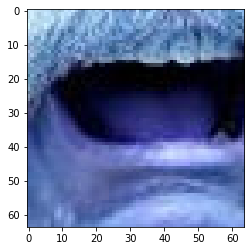

Patch no: 2


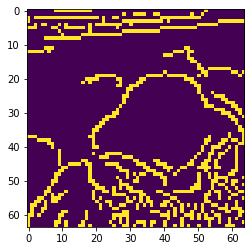

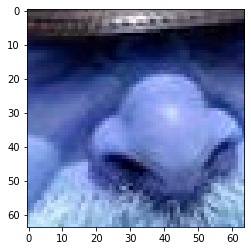

Patch no: 3


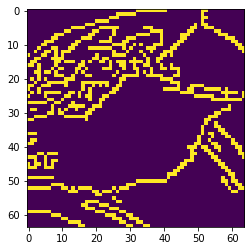

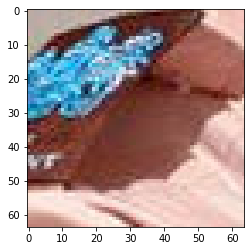

Patch no: 4


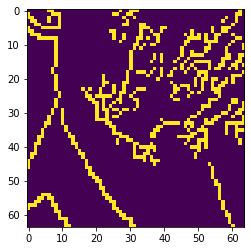

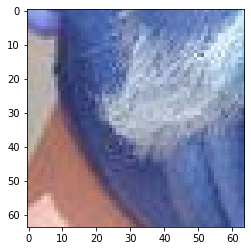

In [73]:
patches = extract_imd_orig(g, 64)

Patch no: 0


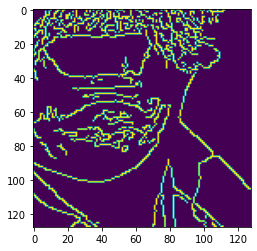

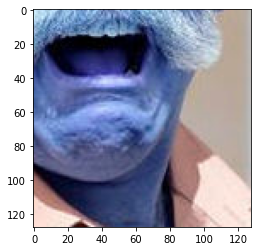

Patch no: 1


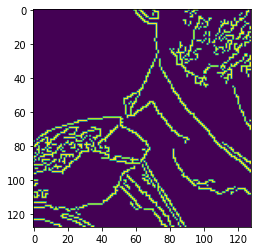

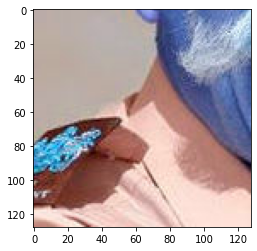

Patch no: 2


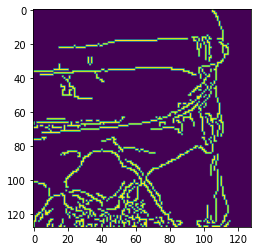

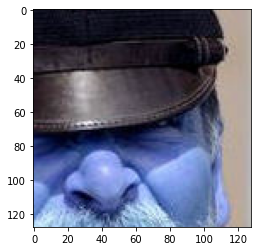

Patch no: 3


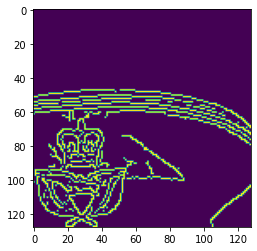

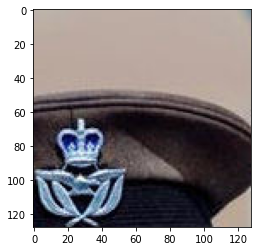

Patch no: 4


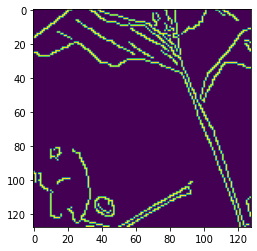

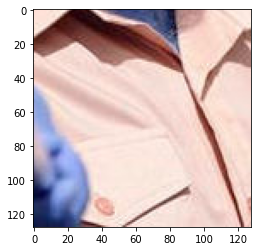

In [74]:
patch = extract_imd_orig(g, 128)

In [11]:
from sklearn import model_selection

df = pd.read_csv('casia2.csv').sample(frac=1).reset_index(drop=True)
df['fold'] = -1
y = df.label.values
kf = model_selection.StratifiedKFold(n_splits=10)

for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'fold'] = f

In [12]:
df.groupby('fold').label.value_counts()

fold  label
0     0        750
      1        510
1     0        749
      1        511
2     0        749
      1        511
3     0        749
      1        510
4     0        749
      1        510
5     0        749
      1        510
6     0        749
      1        510
7     0        749
      1        510
8     0        749
      1        510
9     0        749
      1        510
Name: label, dtype: int64

In [13]:
df.label.value_counts()

0    7491
1    5102
Name: label, dtype: int64

In [14]:
df.to_csv('casia2.csv',index=False)

In [22]:
from casia_dataset import CASIA

train = CASIA(df, 'train', 0, 'Image_Manipulation_Dataset/CASIA_2.0/image_patch_64')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


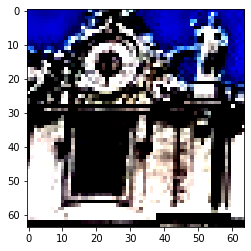

In [25]:
plt.imshow(train[8]['image'].permute(1,2,0))
plt.show()

In [9]:
df64 = pd.read_csv('casia_64.csv')
df64.label.value_counts()

0    37455
1    30406
Name: label, dtype: int64

In [1]:
import os
import glob

files = glob.glob('C:\\Users\\sowme\\Downloads\\Compressed\\IMD2020_real_01\\**\\*.jpg', recursive=True)

In [4]:
import random 
sample = random.sample(files, 1000)

In [11]:
import shutil

DIR = 'G:\\Image_Manipulation_Dataset\\IMD2020\\imd_data\\extra_orig'
for x in tqdm(sample):
    shutil.copy(x, DIR)

100%|██████████| 1000/1000 [00:12<00:00, 78.74it/s]
